# Set up for python environment

In [ ]:
# install packages for getting Twitter data and mapping
!pip install tweepy

In [ ]:
!conda install basemap

In [ ]:
!pip install folium

## Import neccesary packages

In [150]:
import tweepy
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

##### Go to this website for generating an app and take its keys and token: https://developer.twitter.com/en/apps

In [ ]:
# paste your key and secret here.
consumer_key= 'yourkeyhere'
consumer_secret= 'yourkeyhere'
access_token= 'yourkeyhere'
access_token_secret= 'yourkeyhere'

In [ ]:
# Set up for Twitter authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [ ]:
# Set up tweepy API and set rate limit to be true
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Post a tweet from Python
api.update_status("Look, I'm tweeting from #Python in my #GEOG389 class!")

### Search first 100 retweets of a certain tweet

In [194]:
retweets_workshop = api.retweets(1122963268996354049,10)

In [214]:
retweets_workshop[0]._json['user']['name']

'Reece Jones'

In [216]:
[[tweet.user.screen_name, tweet.user.name, tweet.user.location] for tweet in retweets_workshop]

[['reecejhawaii', 'Reece Jones', 'Honolulu, HI'],
 ['Jinwen_X', 'Jinwen Xu', 'Honolulu, HI'],
 ['yiqiang_gis', 'Yi Qiang', 'Honolulu, HI']]

### Current trend in the world

In [189]:
api.trends_available()

[{'name': 'Worldwide',
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'parentid': 0,
  'country': '',
  'woeid': 1,
  'countryCode': None},
 {'name': 'Winnipeg',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 2972,
  'countryCode': 'CA'},
 {'name': 'Ottawa',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3369,
  'countryCode': 'CA'},
 {'name': 'Quebec',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3444,
  'countryCode': 'CA'},
 {'name': 'Montreal',
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',
  'parentid': 23424775,
  'country': 'Canada',
  'woeid': 3534,
  'co

In [192]:
# make San Francisco as an example
api.trends_place(2487956)

[{'trends': [{'name': 'UNC Charlotte',
    'url': 'http://twitter.com/search?q=%22UNC+Charlotte%22',
    'promoted_content': None,
    'query': '%22UNC+Charlotte%22',
    'tweet_volume': 19013},
   {'name': '#Venezuela',
    'url': 'http://twitter.com/search?q=%23Venezuela',
    'promoted_content': None,
    'query': '%23Venezuela',
    'tweet_volume': 1201482},
   {'name': 'Ajax',
    'url': 'http://twitter.com/search?q=Ajax',
    'promoted_content': None,
    'query': 'Ajax',
    'tweet_volume': 470138},
   {'name': 'Sonic',
    'url': 'http://twitter.com/search?q=Sonic',
    'promoted_content': None,
    'query': 'Sonic',
    'tweet_volume': 656249},
   {'name': '#F82019',
    'url': 'http://twitter.com/search?q=%23F82019',
    'promoted_content': None,
    'query': '%23F82019',
    'tweet_volume': None},
   {'name': 'Scott Foster',
    'url': 'http://twitter.com/search?q=%22Scott+Foster%22',
    'promoted_content': None,
    'query': '%22Scott+Foster%22',
    'tweet_volume': 26066}

### Using tweepy cursor to search tweets

In [151]:
# Define the search term and the date_since date as variables
# only date (not specific time) will work in the parameter.
search_words = "#breakfast"
date_since = "2019-4-20"
# date_until = "2019-4-28"

In [152]:
# set up tweepy cursor and search 5 tweets according preset parameters
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(5)
[tweet.text for tweet in tweets]

In [ ]:
for tweet in tweets:
    print(tweet.text)

In [154]:
new_search = search_words + " -filter:retweets"
new_search

'#breakfast -filter:retweets'

In [155]:
tweets = tweepy.Cursor(api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(5)

[tweet.text for tweet in tweets]

['He doesn’t like coconuts but he likes content //\n•\n•\n📸 @lydiamcwherter  //\n•\n•\n#kalapana #hawaii #healthylifestyle… https://t.co/N41YSfhmk9',
 'Raspberry and blueberry wholemeal muffins #raspberry #raspberries #raspberrys #raspberrymuffins #blueberry… https://t.co/q3V3eghv1L',
 "@alexaruby112 You'll have to go a little farther for this #breakfast but we think it's worth it! https://t.co/9tCQ8UgeF2",
 'ᔕᑭᗩᑕIOᑌᔕ ᗪOᖇᗰᔕ starting from 𝟑𝟎,𝟎𝟎 BRL at\nᖇEᖴᑌGIO #Hostel #Fortaleza💜ᗩᒪᗯᗩYᔕ with #breakfast☕ with or without ᗩᑕ❄ wi… https://t.co/i5WADSOreO',
 'Why is coffee so good....who all is addicted to coffee? #coffee #gamingcommunity #breakfast #morning #addicted']

In [157]:
tweets = tweepy.Cursor(api.search,
                       q=new_search, # q means search query
                       lang="en",
                       since=date_since).items(5)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['theWNK', 'Washington, DC'], ['stevejamesltd', 'South West, England'], ['JimsCountryEats', 'Pleasanton, CA'], ['RefugioHostelFo', 'Fortaleza, Brasil'], ['KrronTV', 'Grande Prairie, Alberta']]


In [ ]:
tweet_text = pd.DataFrame(data=users_locs, columns=['user', 'location'])
tweet_text

## Query for keyword "rain" in Oahu, Hawaii

In [162]:
new_search = "rain"
#new_search = "rain -filter: retweet"

tweets = tweepy.Cursor(api.search,
                   q=new_search,
                   #bounding_box = b_box,
                   geocode = "21.473,-157.9868,50mi",
                   lang="en").items(400)

users_locs = [[tweet.user.screen_name, tweet.text, tweet.user.location,tweet.place] for tweet in tweets]

##### Make searched data into a dataframe

In [165]:
locationinfo = pd.DataFrame(data=users_locs, 
                    columns=['user', "text","location","place"])

In [266]:
locationinfo.head()

,user,text,location,place
0,coreyray44,Fuck rain,"Schofield Barracks, HI",None
1,Cpkaalekahi35,Where did that rain go? 🥵,"Ewa Beach, HI",Place(_api=<tweepy.api.API object at 0x11f8afa...
2,oneoceandiving,Sharks help us breathe. While rain forests are...,"Haleiwa, Hawaii",None
3,alohacitour,"You can't have rainbows without rain. So, smil...","Honolulu, HI",None
4,frankstah,I went to pay respects at @USSUtah yesterday a...,"Honolulu, Hawaii",None


In [170]:
print(len(locationinfo[locationinfo['place'].notna()]),"/",len(locationinfo))

86 / 300


In [177]:
tweet_loc = locationinfo.loc[locationinfo['place'].notna()].copy()

In [178]:
tweet_loc['place_name'] = tweet_loc.place.apply(lambda s:s.name)

In [185]:
tweet_loc.place[1].bounding_box.coordinates[0]

[[-158.025199, 21.312725],
 [-157.92646, 21.312725],
 [-157.92646, 21.376774],
 [-158.025199, 21.376774]]

In [186]:
tweet_loc['bounding_box'] = tweet_loc.place.apply(lambda s:s.bounding_box.coordinates[0])

In [187]:
tweet_loc.head()

,user,text,location,place,place_name,bounding_box
1,Cpkaalekahi35,Where did that rain go? 🥵,"Ewa Beach, HI",Place(_api=<tweepy.api.API object at 0x11f8afa...,Joint Base Pearl Harbor-Hickam,"[[-158.025199, 21.312725], [-157.92646, 21.312..."
7,KaneoheHI,light rain -&gt; clear sky\ntemperature down 7...,"Kaneohe, HI",Place(_api=<tweepy.api.API object at 0x11f8afa...,Kaneohe,"[[-157.8309972, 21.3850908], [-157.760186, 21...."
9,federalhillmike,Forecast for the last 21 months of Trumps Evil...,"Maunalani, Hawai‘i",Place(_api=<tweepy.api.API object at 0x11f8afa...,Honolulu,"[[-157.950476, 21.254837], [-157.648702, 21.25..."
11,karatekittie,Rain couldn’t ruin our magical anniversary din...,"iPhone: 34.016510,-118.404633",Place(_api=<tweepy.api.API object at 0x11f8afa...,Honolulu,"[[-157.950476, 21.254837], [-157.648702, 21.25..."
14,KaneoheHI,"current weather in Kaneohe: light rain, 76°F\n...","Kaneohe, HI",Place(_api=<tweepy.api.API object at 0x11f8afa...,Kaneohe,"[[-157.8309972, 21.3850908], [-157.760186, 21...."


In [243]:
tweet_loc['point']  = tweet_loc['bounding_box'].apply(lambda s: [(s[0][1]+s[2][1])/2,(s[0][0]+s[2][0])/2])

In [ ]:
tweet_loc['lat']  = tweet_loc['bounding_box'].apply(lambda s: (s[0][1]+s[2][1])/2)

In [227]:
tweet_loc['lon']  = tweet_loc['bounding_box'].apply(lambda s: (s[0][0]+s[2][0])/2)

In [244]:
tweet_loc.head()

,user,text,location,place,place_name,bounding_box,point,lat,lon
1,Cpkaalekahi35,Where did that rain go? 🥵,"Ewa Beach, HI",Place(_api=<tweepy.api.API object at 0x11f8afa...,Joint Base Pearl Harbor-Hickam,"[[-158.025199, 21.312725], [-157.92646, 21.312...","[21.3447495, -157.97582949999997]",21.344749,-157.975829
7,KaneoheHI,light rain -&gt; clear sky\ntemperature down 7...,"Kaneohe, HI",Place(_api=<tweepy.api.API object at 0x11f8afa...,Kaneohe,"[[-157.8309972, 21.3850908], [-157.760186, 21....","[21.406922899999998, -157.79559160000002]",21.406923,-157.795592
9,federalhillmike,Forecast for the last 21 months of Trumps Evil...,"Maunalani, Hawai‘i",Place(_api=<tweepy.api.API object at 0x11f8afa...,Honolulu,"[[-157.950476, 21.254837], [-157.648702, 21.25...","[21.3199435, -157.799589]",21.319944,-157.799589
11,karatekittie,Rain couldn’t ruin our magical anniversary din...,"iPhone: 34.016510,-118.404633",Place(_api=<tweepy.api.API object at 0x11f8afa...,Honolulu,"[[-157.950476, 21.254837], [-157.648702, 21.25...","[21.3199435, -157.799589]",21.319944,-157.799589
14,KaneoheHI,"current weather in Kaneohe: light rain, 76°F\n...","Kaneohe, HI",Place(_api=<tweepy.api.API object at 0x11f8afa...,Kaneohe,"[[-157.8309972, 21.3850908], [-157.760186, 21....","[21.406922899999998, -157.79559160000002]",21.406923,-157.795592


### Make interactive map using folium package

In [230]:
import folium

In [231]:
oahu = folium.Map(location = [21.473,-157.9868],zoom_start = 10)

In [262]:
for i, row in tweet_loc.iterrows():
    folium.Marker(row.point,popup = row.text).add_to(oahu)

In [263]:
display(oahu)

### Making traditional map using basemap package

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-158.36,21.21,-157.59,21.8&bboxSR=4269&imageSR=4269&size=2000,1532&dpi=96&format=png32&transparent=true&f=image


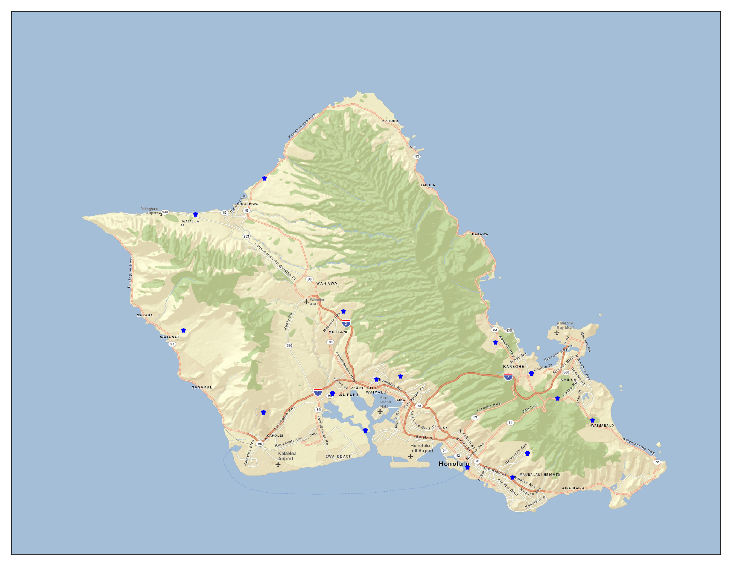

In [265]:
f, ax1 = plt.subplots(1, figsize=(15, 10))

map = Basemap(llcrnrlon=-158.36,llcrnrlat=21.21,urcrnrlon=-157.59,urcrnrlat=21.8, epsg=4269, ax=ax1)
#https://www.bdmweather.com/2018/04/python-m-arcgisimage-basemap-options/

map.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels = 2000, verbose= True)

#ct.plot(color='white', edgecolor='black', linewidth = .1,ax=ax1)
ax1.plot(tweet_loc['lon'],tweet_loc['lat'],'b*',markersize=5)


plt.show()